The dataset used in this file has been derived from the csv file on the following UK.gov website:-
https://commonslibrary.parliament.uk/research-briefings/cbp-8647/

Import libraries

In [470]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load and read dataset

In [471]:
dataset=pd.read_csv("https://raw.githubusercontent.com/TracyRenee61/UK-Parlimentary-Elections/main/UK_gen_election_2019.csv")
dataset

,seats,constituency,region,electorate,con_votes,lib_votes,lab_votes,oth_votes,tot_votes,year,turnout,boundary_set
0,1,BATTERSEA NORTH,London,38552.0,17676.0,7101.0,5634.0,11231.0,16865.0,1918.0,0.437,1918-35
1,1,BATTERSEA SOUTH,London,43036.0,15670.0,2273.0,3383.0,1657.0,22983.0,1918.0,0.534,1918-35
2,1,BERMONDSEY ROTHERHITHE,London,25008.0,5639.0,3889.0,1750.0,1961.0,11278.0,1918.0,0.451,1918-35
3,1,BERMONDSEY WEST BERMONDSEY,London,23100.0,17676.0,4260.0,1956.0,4292.0,10508.0,1918.0,0.455,1918-35
4,1,BETHNAL GREEN NORTH EAST,London,25253.0,17676.0,7101.0,16724.0,7887.0,7887.0,1918.0,0.312,1918-35
...,...,...,...,...,...,...,...,...,...,...,...,...
17693,1,Thirsk and Malton,Yorkshire and The Humber,80991.0,35634.0,6774.0,10480.0,3700.0,56588.0,2019.0,0.699,2010-19
17694,1,Wakefield,Yorkshire and The Humber,70192.0,21283.0,1772.0,17925.0,4047.0,45027.0,2019.0,0.641,2010-19
17695,1,Wentworth and Dearne,Yorkshire and The Humber,74536.0,14577.0,1705.0,16742.0,8533.0,41557.0,2019.0,0.558,2010-19
17696,1,York Central,Yorkshire and The Humber,74899.0,13767.0,4149.0,27312.0,4277.0,49505.0,2019.0,0.661,2010-19


Check for null values

In [472]:
dataset.isnull().sum().sum()

0

Create dataframe for predictions

In [473]:
tory = pd.DataFrame({'constituency': dataset.constituency, 'region': dataset.region, 'electorate': dataset.electorate,'party': 'Tories', 'votes': dataset.con_votes, 'year':dataset.year })
tory

,constituency,region,electorate,party,votes,year
0,BATTERSEA NORTH,London,38552.0,Tories,17676.0,1918.0
1,BATTERSEA SOUTH,London,43036.0,Tories,15670.0,1918.0
2,BERMONDSEY ROTHERHITHE,London,25008.0,Tories,5639.0,1918.0
3,BERMONDSEY WEST BERMONDSEY,London,23100.0,Tories,17676.0,1918.0
4,BETHNAL GREEN NORTH EAST,London,25253.0,Tories,17676.0,1918.0
...,...,...,...,...,...,...
17693,Thirsk and Malton,Yorkshire and The Humber,80991.0,Tories,35634.0,2019.0
17694,Wakefield,Yorkshire and The Humber,70192.0,Tories,21283.0,2019.0
17695,Wentworth and Dearne,Yorkshire and The Humber,74536.0,Tories,14577.0,2019.0
17696,York Central,Yorkshire and The Humber,74899.0,Tories,13767.0,2019.0


In [474]:
labour = pd.DataFrame({'constituency': dataset.constituency, 'region': dataset.region, 'electorate': dataset.electorate,'party': 'Labour', 'votes': dataset.lab_votes, 'year':dataset.year })
labour

,constituency,region,electorate,party,votes,year
0,BATTERSEA NORTH,London,38552.0,Labour,5634.0,1918.0
1,BATTERSEA SOUTH,London,43036.0,Labour,3383.0,1918.0
2,BERMONDSEY ROTHERHITHE,London,25008.0,Labour,1750.0,1918.0
3,BERMONDSEY WEST BERMONDSEY,London,23100.0,Labour,1956.0,1918.0
4,BETHNAL GREEN NORTH EAST,London,25253.0,Labour,16724.0,1918.0
...,...,...,...,...,...,...
17693,Thirsk and Malton,Yorkshire and The Humber,80991.0,Labour,10480.0,2019.0
17694,Wakefield,Yorkshire and The Humber,70192.0,Labour,17925.0,2019.0
17695,Wentworth and Dearne,Yorkshire and The Humber,74536.0,Labour,16742.0,2019.0
17696,York Central,Yorkshire and The Humber,74899.0,Labour,27312.0,2019.0


In [475]:
liberal = pd.DataFrame({'constituency': dataset.constituency, 'region': dataset.region, 'electorate': dataset.electorate,'party': 'Liberals', 'votes': dataset.lib_votes, 'year':dataset.year })
liberal

,constituency,region,electorate,party,votes,year
0,BATTERSEA NORTH,London,38552.0,Liberals,7101.0,1918.0
1,BATTERSEA SOUTH,London,43036.0,Liberals,2273.0,1918.0
2,BERMONDSEY ROTHERHITHE,London,25008.0,Liberals,3889.0,1918.0
3,BERMONDSEY WEST BERMONDSEY,London,23100.0,Liberals,4260.0,1918.0
4,BETHNAL GREEN NORTH EAST,London,25253.0,Liberals,7101.0,1918.0
...,...,...,...,...,...,...
17693,Thirsk and Malton,Yorkshire and The Humber,80991.0,Liberals,6774.0,2019.0
17694,Wakefield,Yorkshire and The Humber,70192.0,Liberals,1772.0,2019.0
17695,Wentworth and Dearne,Yorkshire and The Humber,74536.0,Liberals,1705.0,2019.0
17696,York Central,Yorkshire and The Humber,74899.0,Liberals,4149.0,2019.0


In [476]:
other = pd.DataFrame({'constituency': dataset.constituency, 'region': dataset.region, 'electorate': dataset.electorate, 'party': 'Other', 'votes': dataset.oth_votes, 'year':dataset.year })
other

,constituency,region,electorate,party,votes,year
0,BATTERSEA NORTH,London,38552.0,Other,11231.0,1918.0
1,BATTERSEA SOUTH,London,43036.0,Other,1657.0,1918.0
2,BERMONDSEY ROTHERHITHE,London,25008.0,Other,1961.0,1918.0
3,BERMONDSEY WEST BERMONDSEY,London,23100.0,Other,4292.0,1918.0
4,BETHNAL GREEN NORTH EAST,London,25253.0,Other,7887.0,1918.0
...,...,...,...,...,...,...
17693,Thirsk and Malton,Yorkshire and The Humber,80991.0,Other,3700.0,2019.0
17694,Wakefield,Yorkshire and The Humber,70192.0,Other,4047.0,2019.0
17695,Wentworth and Dearne,Yorkshire and The Humber,74536.0,Other,8533.0,2019.0
17696,York Central,Yorkshire and The Humber,74899.0,Other,4277.0,2019.0


Combine datasets

In [477]:
df = tory.append([labour, liberal, other]).reset_index()
df

,index,constituency,region,electorate,party,votes,year
0,0,BATTERSEA NORTH,London,38552.0,Tories,17676.0,1918.0
1,1,BATTERSEA SOUTH,London,43036.0,Tories,15670.0,1918.0
2,2,BERMONDSEY ROTHERHITHE,London,25008.0,Tories,5639.0,1918.0
3,3,BERMONDSEY WEST BERMONDSEY,London,23100.0,Tories,17676.0,1918.0
4,4,BETHNAL GREEN NORTH EAST,London,25253.0,Tories,17676.0,1918.0
...,...,...,...,...,...,...,...
70787,17693,Thirsk and Malton,Yorkshire and The Humber,80991.0,Other,3700.0,2019.0
70788,17694,Wakefield,Yorkshire and The Humber,70192.0,Other,4047.0,2019.0
70789,17695,Wentworth and Dearne,Yorkshire and The Humber,74536.0,Other,8533.0,2019.0
70790,17696,York Central,Yorkshire and The Humber,74899.0,Other,4277.0,2019.0


In [478]:
year = 2017

include = df[df['year'] == year]
exclude = df[df['year'] != year]
include

,index,constituency,region,electorate,party,votes,year
16398,16398,ALDERSHOT,South East,76205.0,Tories,26950.0,2017.0
16399,16399,ALDRIDGE-BROWNHILLS,West Midlands,60363.0,Tories,26317.0,2017.0
16400,16400,ALTRINCHAM AND SALE WEST,North West,73226.0,Tories,26933.0,2017.0
16401,16401,AMBER VALLEY,East Midlands,68065.0,Tories,25905.0,2017.0
16402,16402,ARUNDEL AND SOUTH DOWNS,South East,79478.0,Tories,37573.0,2017.0
...,...,...,...,...,...,...,...
70137,17043,CAERPHILLY,Wales,64381.0,Other,1706.0,2017.0
70138,17044,ISLWYN,Wales,56256.0,Other,1605.0,2017.0
70139,17045,VALE OF GLAMORGAN,Wales,73959.0,Other,1591.0,2017.0
70140,17046,CARDIFF WEST,Wales,66775.0,Other,698.0,2017.0


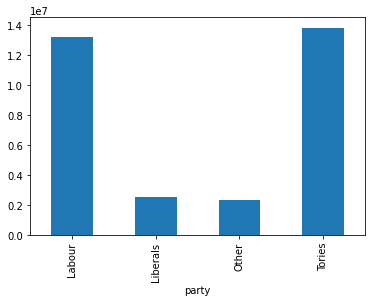

In [479]:
include.groupby('party')['votes'].sum().plot.bar(ylim=0)
plt.show()

In [480]:
year = 2019

include = df[df['year'] == year]
exclude = df[df['year'] != year]
include

,index,constituency,region,electorate,party,votes,year
17048,17048,Basildon and Billericay,East,69906.0,Tories,29590.0,2019.0
17049,17049,Bedford,East,71581.0,Tories,20346.0,2019.0
17050,17050,Braintree,East,75208.0,Tories,34112.0,2019.0
17051,17051,Brentwood and Ongar,East,75255.0,Tories,36308.0,2019.0
17052,17052,Broadland,East,78151.0,Tories,33934.0,2019.0
...,...,...,...,...,...,...,...
70787,17693,Thirsk and Malton,Yorkshire and The Humber,80991.0,Other,3700.0,2019.0
70788,17694,Wakefield,Yorkshire and The Humber,70192.0,Other,4047.0,2019.0
70789,17695,Wentworth and Dearne,Yorkshire and The Humber,74536.0,Other,8533.0,2019.0
70790,17696,York Central,Yorkshire and The Humber,74899.0,Other,4277.0,2019.0


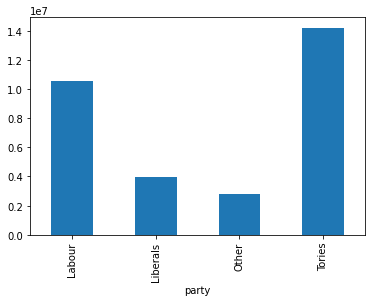

In [481]:
include.groupby('party')['votes'].sum().plot.bar(ylim=0)
plt.show()

Create pivot table

In [482]:
#create pivot table
ds = df.pivot_table(index = (['party']),values = ['votes'],columns = ['year'],aggfunc='sum', fill_value=0).reset_index()
ds

party    votes           ...                              
year             1918.0   1922.0  ...    2015.0    2017.0    2019.0
0       Labour  7618163  7213796  ...   9665029  13195674  10586807
1     Liberals  4282840  4481222  ...   2550835   2520982   3973358
2        Other  3430757  2555070  ...   6006431   2297269   2772825
3       Tories  8495590  7487191  ...  11352637  13848796  14231594

[4 rows x 28 columns]

In [483]:
party = ds.party

ds = ds.drop(['party'],axis=1)
ds

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:3889: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


votes                    ...                              
year   1918.0   1922.0   1923.0  ...    2015.0    2017.0    2019.0
0     7618163  7213796  7191335  ...   9665029  13195674  10586807
1     4282840  4481222  5166075  ...   2550835   2520982   3973358
2     3430757  2555070  1347193  ...   6006431   2297269   2772825
3     8495590  7487191  6597562  ...  11352637  13848796  14231594

[4 rows x 27 columns]

Define X, y and X_test

In [484]:
#split the dataset in two
# the last column is our label
y_train = ds.iloc[:,-1:]
#drop last column of data
X_train = ds.iloc[:, :-1]
#drop first colum of data
X_test = ds.iloc[:,1:]
# lets have a look on the shape 
print(X_train.shape,y_train.shape,X_test.shape)

(4, 26) (4, 1) (4, 26)


Define model

In [485]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor

model = AdaBoostRegressor(base_estimator = RandomForestRegressor(max_depth=5), random_state=1, n_estimators=1000).fit(X_train, y_train)
y_pred = model.predict(X_train)
y_pred

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([8999893.64, 3925336.68, 3193011.55, 9820552.52])

In [486]:
print(model.score(X_train, y_train))

0.7511132130082189


Make predictions

In [487]:
pred = model.predict(X_test)
pred = pred.astype(int)
pred

array([8794728, 4275639, 3265043, 9512805])

In [488]:
# creating dataframe with required columns 
prediction = pd.DataFrame({'party':party, 'prediction': pred})
prediction

,party,prediction
0,Labour,8794728
1,Liberals,4275639
2,Other,3265043
3,Tories,9512805


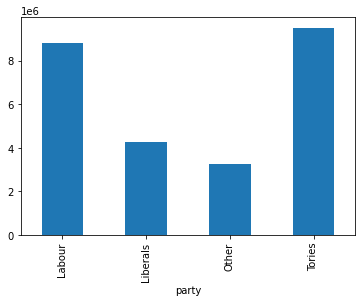

In [489]:
prediction.groupby('party')['prediction'].sum().plot.bar(ylim=0)
plt.show()